# 4) 이커머스 재구매율 개선안 도출 (action item)


### 분석 결과, 고객 이탈의 주요 원인은 제품 품질 문제, 배송 지연, 사이트 불만족이었습니다.

- ### ∴ 이커머스 재구매율 개선 방안은 다음과 같습니다. 
 

## <1> 문제 제품군 식별 후 품질 개선

    - 결론 : 아래 제품군들의 품질을 개선합니다. (종합 점수 기준)
    
        - 가전/전자제품, 가구/인테리어  (카테고리 대분류)
        - 가구 및 장식, 건강 및 미용 등 (카테고리 소분류) 


        
        - 







- 참고 )  '종합 점수' 계산
    - 종합 점수 높음 == 부정 리뷰 받은 제품'수' 많고 & 부정 '비율' 높음  
    - 종합점수 = 부정적인 리뷰 제품수 * (부정비율 / 100) 

    - 

 
    - 

## <2> 지역 물류 센터를 설치해 배송 시간 단축

    - 결론 : 3개 도시들에 지역 물류 센터를 설치합니다. (파레토 법칙 + 가중치 점수 기준) 
    
        - 상파울루 (SP), 벨루오리존치 (MG), 리오데자네이로 (RJ)   
           (각각 경제 중심지, 산업 중심지, 항만과 공항 인프라 발달)
        
        - 선택과 집중 전략으로 주요 경제 지역에 물류 센터를 설치해야 함. 
             (브라질은 지리적 한계 존재 - 교통 인프라 미비, 아마존 밀림 지역 등 모든 지역을 포괄할 수 없기 때문)


        
        - 





- 참고 ) '파레토 법칙 + 가중치 점수' 계산 
    - 파레토 법칙을 기반으로 상위 20% 판매자가 밀집된 주(state)에 가중치(1.5)를 부여하고, 점수는 고객 수, 판매자 수, 평균 거리 등을 반영해 계산합니다. 
    - 점수= α* 고객 수 + β *판매자수 * 파레토 가중치−γ⋅(평균 거리)

----

# <1> 문제 제품군 식별 후 품질 개선

- 문제가 되는 제품 카테고리. 개선이 필요한 제품군 추리기.
- 가설 검증 바탕으로

In [ ]:
## 이탈고객
## 제품 중 부정적인거. 
d_0 = df_rev[df_rev['리뷰내용_한국어번역'].str.contains('제품') &
             df_rev['리뷰내용_한국어번역'].str.contains('미흡|불완전|하자|꺼져|약하|떨어|손상|불량|안|부족|불가능|없|스트레스|실망|오류|환불|누락|불만|어려|한탄|어려움|취소|반품|문제|최악|터무니없|황당|짧|적|작|나쁘|슬프|낮|다르|손상|후회|비관|열등|결함|취소', regex=True)]
 
d_00 = df_rev[df_rev['리뷰내용_한국어번역'].str.contains('제품')]

## 이탈고객
## 품질 중 부정적인거.
 
d_1 = df_rev[df_rev['리뷰내용_한국어번역'].str.contains('마감') &
             df_rev['리뷰내용_한국어번역'].str.contains('싫|불명|너|않|불|미흡|불완전|부서|하자|꺼져|약하|떨어|손상|불량|안|힘들|부족|불가능|없|스트레스|실망|오류|환불|누락|불만|어려|한탄|어려움|취소|지체|반품|문제|미만|이하|최악|터무니없|황당|짧|작|적|나쁘|슬프|어렵|낮|다르|손상|후회|비관|열등|비싸|결함|취소', regex=True)]
 
d_11 = df_rev[df_rev['리뷰내용_한국어번역'].str.contains('마감') ]

## 이탈고객
## 마감 중 부정적인거.
 
d_2 = df_rev[df_rev['리뷰내용_한국어번역'].str.contains('품질') &
             df_rev['리뷰내용_한국어번역'].str.contains('부서|싫|불|미흡|불완전|부서|하자|꺼져|약하|떨어|손상|불량|안|힘들|부족|불가능|없|스트레스|실망|오류|환불|누락|불만|어려|한탄|어려움|취소|지체|반품|문제|미만|이하|최악|터무니없|황당|짧|나쁘|슬프|어렵|낮|다르|손상|후회|비관|열등|비싸|결함|취소', regex=True)]

d_22 = df_rev[df_rev['리뷰내용_한국어번역'].str.contains('품질')]

dddd = pd.DataFrame(pd.concat([d_0, d_1, d_2])['category_대분류'].value_counts()).reset_index()
dddd2 = pd.DataFrame(pd.concat([d_00, d_11, d_22])['category_대분류'].value_counts()).reset_index()

haha = pd.merge(dddd, dddd2, left_on = 'category_대분류',right_on = 'category_대분류')
haha.columns =['category_대분류', '부정', '전체(제품 품질 및 마감 관련)']
haha['부정비율(%)'] = (haha['부정']/haha['전체(제품 품질 및 마감 관련)'])*100

dddd = pd.DataFrame(pd.concat([d_0, d_1, d_2])['category_korean'].value_counts()).reset_index()
dddd2 = pd.DataFrame(pd.concat([d_00, d_11, d_22])['category_korean'].value_counts()).reset_index()

haha2 = pd.merge(dddd, dddd2, left_on = 'category_korean',right_on = 'category_korean')
haha2.columns =['category_korean', '부정', '전체(제품 품질 및 마감 관련)']
haha2['부정비율(%)'] = (haha2['부정']/haha2['전체(제품 품질 및 마감 관련)'])*100

## 주요 문제 제품군(카테고리별) 식별

In [ ]:
import plotly.graph_objects as go

# 데이터
categories = ['가구/인테리어', '가전/전자제품', '취미/레저/스포츠', '가정용품/생활용품', '애완/유아',
              '패션/액세서리', '건강/미용','서적/미술/교육','비즈니스/산업','식품/음료']
values = [529, 432, 309, 263, 236, 227, 224,57,15,6]

# 그래프 생성
fig = go.Figure(data=[go.Bar(x=categories, y=values)])

# 제목 및 레이아웃 설정
fig.update_layout(
    title='문제 제품군 식별 - 카테고리 대분류 / 제품 품질 및 마감 관련(이탈고객)',
    xaxis_title='카테고리 대분류',
    yaxis_title='제품군 수(부정 리뷰)'
)

# 그래프 출력
fig.show()

In [ ]:
import plotly.graph_objects as go

# 데이터 정의
categories = ['가구/인테리어', '가전/전자제품', '취미/레저/스포츠', '가정용품/생활용품',
              '애완/유아', '패션/액세서리', '건강/미용','서적/미술/교육','비즈니스/산업','식품/음료']
values = [20.639875, 27.016886, 23.444613, 22.849696, 25.376344, 22.386588,
          19.227468,20.879121,26.315789, 9.230769]

# 데이터를 내림차순으로 정렬
sorted_data = sorted(zip(categories, values), key=lambda x: x[1], reverse=True)

# 정렬된 데이터 추출
sorted_categories = [x[0] for x in sorted_data]
sorted_values = [x[1] for x in sorted_data]

# 그래프 생성
fig = go.Figure(data=[go.Bar(x=sorted_categories, y=sorted_values)])

# 라벨로 퍼센트 표시
fig.update_traces(text=sorted_values, texttemplate='%{text:.2f}%', textposition='inside')

# 제목 및 레이아웃 설정
fig.update_layout(
    title='부정비율 (%) - 카테고리 대분류 / 제품 품질 및 마감 관련(이탈고객)',
    xaxis_title='카테고리 대분류',
    yaxis_title='부정비율(%)'
)

# 그래프 출력
fig.show()

In [ ]:
# import pandas as pd

# 데이터 생성
data = {
    'category_대분류': ['가구/인테리어', '가전/전자제품', '취미/레저/스포츠', '가정용품/생활용품', '애완/유아',
                      '패션/액세서리', '건강/미용', '서적/미술/교육', '비즈니스/산업', '식품/음료'],
    '부정적인리뷰인제품수': [529, 432, 309, 263, 236, 227, 224, 57, 15, 6],
    '부정비율(%)': [20.639875, 27.016886, 23.444613, 22.849696, 25.376344, 22.386588, 19.227468,
                   20.879121, 26.315789, 9.230769]
}

# DataFrame 생성
ddddd = pd.DataFrame(data)

# 부정적인리뷰인제품수와 부정비율을 종합적으로 고려한 점수 계산
# 종합 점수 = 부정적인리뷰인제품수 * (부정비율 / 100)로 가중치를 부여
ddddd['종합점수'] = ddddd['부정적인리뷰인제품수'] * (ddddd['부정비율(%)'] / 100)

# 종합점수 기준 내림차순 정렬
ddddd_sorted = ddddd.sort_values(by='종합점수', ascending=False)

# 출력
print(ddddd_sorted[['category_대분류', '부정적인리뷰인제품수', '부정비율(%)', '종합점수']])


  category_대분류  부정적인리뷰인제품수    부정비율(%)        종합점수
1      가전/전자제품         432  27.016886  116.712948
0      가구/인테리어         529  20.639875  109.184939
2    취미/레저/스포츠         309  23.444613   72.443854
3    가정용품/생활용품         263  22.849696   60.094700
4        애완/유아         236  25.376344   59.888172
5      패션/액세서리         227  22.386588   50.817555
6        건강/미용         224  19.227468   43.069528
7     서적/미술/교육          57  20.879121   11.901099
8      비즈니스/산업          15  26.315789    3.947368
9        식품/음료           6   9.230769    0.553846


In [ ]:
import plotly.express as px
import pandas as pd

# 데이터 생성
data = {
    'category_대분류': ['가전/전자제품', '가구/인테리어', '취미/레저/스포츠', '가정용품/생활용품', '애완/유아',
                      '패션/액세서리', '건강/미용', '서적/미술/교육', '비즈니스/산업', '식품/음료'],
    '종합점수': [116.712948, 109.184939, 72.443854, 60.094700, 59.888172, 50.817555,
                 43.069528, 11.901099, 3.947368, 0.553846]
}

dfdfdf = pd.DataFrame(data)

# 막대 그래프 생성
fig = px.bar(dfdfdf, x='category_대분류', y='종합점수', title="종합점수 by 문제 제품군(카테고리 대분류)",
             labels={'category_대분류': '카테고리 대분류', '종합점수': '종합점수'},
             text='종합점수')

# x축 레이블 각도 조정
fig.update_layout(xaxis_tickangle=-45)

# 그래프 출력
fig.show()

In [ ]:

# 데이터
import plotly.graph_objects as go

# 데이터
categories_korean = ['침대, 욕실, 테이블 용품', '컴퓨터 및 액세서리', '스포츠 및 레저', '건강 및 미용',
                     '가구 및 장식', '시계 및 선물', '장난감', '가정용품', '신기한 물건', '전화기',
                     '정원 도구', '자동차', '향수', '사무용 가구', '가방 및 액세서리', '유아용품',
                     '전자제품'   , '콘솔 및 게임', '애완동물 상점', '소형 가전제품']
                     #, '가전제품', '악기',
                     #'오디오', '거실 가구', '건축 도구 및 자재', '가정용 편안함', '패션 신발',
                     #'남성 패션 의류', '에어컨', '가정용 건축 자재', '유선 전화', '주방, 다이닝, 세탁, 정원 가구',
                     #'컴퓨터', '신호 및 보안', '패션 속옷 및 비치웨어', '침실 가구', '크리스마스 용품',
                     #'여성 패션 의류', '영화 및 사진', '음악', '태블릿, 인쇄 및 이미지', '기저귀 및 위생용품']
values = [197, 171, 167, 155, 144, 142, 136, 126, 123, 119, 83, 82, 68, 67, 64, 63, 61, 39, 37, 23]
        #  21, 18, 17, 12, 12, 11, 9, 8, 7, 7, 7, 5, 5, 3, 3, 2, 1, 1, 1, 1, 1]

# 데이터 오름차순 정렬
sorted_data = sorted(zip(values, categories_korean))

# 정렬된 값과 카테고리 분리
sorted_values, sorted_categories = zip(*sorted_data)

# 가로 막대 그래프 생성
fig = go.Figure(data=[go.Bar(x=sorted_values, y=sorted_categories, orientation='h')])



fig.update_layout(
    title='문제 제품군 식별 - 카테고리 소분류 / 제품 품질 및 마감 관련 (이탈고객)',
    xaxis_title='카테고리 소분류',
    yaxis_title='제품군 수(부정 리뷰)',
    xaxis_tickangle=-45,  # 카테고리 이름이 겹치지 않도록 회전
    showlegend=False
)

# 그래프 출력
fig.show()



In [ ]:
import plotly.graph_objects as go

# 데이터 정의
categories = ['침대, 욕실, 테이블 용품', '컴퓨터 및 액세서리', '스포츠 및 레저', '건강 및 미용',
              '가구 및 장식', '시계 및 선물', '장난감', '가정용품', '신기한 물건', '전화기',
              '정원 도구', '자동차', '향수', '사무용 가구', '가방 및 액세서리', '유아용품', '전자제품']
values = [18.257646, 28.264463, 22.721088, 19.041769, 22.153846, 26.199262, 27.037773, 22.540250,
          23.518164, 24.040404, 16.338583, 24.550898, 19.428571, 40.119760, 16.976127, 24.513619, 32.795699]

# 데이터를 오름차순으로 정렬
sorted_data = sorted(zip(categories, values), key=lambda x: x[1])

# 정렬된 데이터 추출
sorted_categories = [x[0] for x in sorted_data]
sorted_values = [x[1] for x in sorted_data]

# 그래프 생성
fig = go.Figure(data=[go.Bar(
    x=sorted_values,
    y=sorted_categories,
    orientation='h'
)])

# 라벨로 퍼센트 표시
fig.update_traces(text=sorted_values, texttemplate='%{text:.2f}%', textposition='inside')

# 제목 및 레이아웃 설정
fig.update_layout(
    title='부정비율 (%) - 카테고리 소분류',
    xaxis_title='부정비율(%)',
    yaxis_title='카테고리 소분류'
)

# 그래프 출력
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# 데이터 입력
# haha2[['category_korean', '부정','부정비율(%)']]

# 종합점수 계산
haha2['종합점수'] = haha2['부정'] * (haha2['부정비율(%)'] / 100)

categories = list(haha2['category_korean'])

values =  list(haha2['종합점수'])
# 데이터를 오름차순으로 정렬
sorted_data = sorted(zip(categories, values), key=lambda x: x[1])

# 정렬된 데이터 추출
sorted_categories = [x[0] for x in sorted_data]
sorted_values = [x[1] for x in sorted_data]

filtered_categories = [category for category, value in zip(sorted_categories, sorted_values) if value >= 5]
filtered_values = [value for value in sorted_values if value >= 10]


# 그래프 생성
fig = go.Figure(data=[go.Bar(
    x=filtered_values,
    y=filtered_categories,
    orientation='h'
)])

# 라벨로 퍼센트 표시
fig.update_traces(text=filtered_values,   textposition='inside')

# 제목 및 레이아웃 설정
fig.update_layout(
    title='종합점수 by 문제 제품군(카테고리 소분류)',
    xaxis_title='종합 점수 (10 이상만 표시)',
    yaxis_title='카테고리 소분류'
)

# 그래프 출력
fig.show()

#  <2> 지역 물류 센터를 설치해 배송 시간 단축

###  판매자와 제품 다양성 분석
(1) 판매자 수(2,988)
- 판매자 집중도 확인:  ---- 파레토 분석 결과, 파레토 법칙 yes! 따라서 단순히 판매자수를 늘리는건 큰 효과는 없다.

    - 상위 판매자들이 매출의 대부분을 차지한다면, 판매자 수를 단순히 늘리는 것이 큰 효과가 없을 수 있습니다.
    - 예: 상위 20% 판매자가 매출의 80%를 차지하는지 확인 (파레토 분석).
- 지역 다양성: ---하지만 지역기반 판매자 증가는 고려해볼 수 있다.

    - 고객-판매자 거리(km)가 중요한 변수라면, 지역 기반의 판매자 증가가 효과적일 수 있습니다.
    - 예: 특정 지역에 판매자가 부족하다면, 해당 지역을 타겟으로 판매자를 확보.


상위 516개 판매자가 매출의 80%를 차지합니다. (파레토 법칙 yes)
                                 판매자id            매출    누적매출비율   누적판매자비율
829   4869f7a5dfa277a7dca6462dcf3b52b2  64599.268089  0.018297  0.000335
978   53243585a1d6dc2643021fd1853d8905  63221.928175  0.036205  0.000669
2920  fa1c13f2614d7b5c4749cbc52fecda94  56450.236338  0.052194  0.001004
1506  7e93a43ef30c4f03f38b393420bc753a  53975.228892  0.067482  0.001339
853   4a3ca9315b744ce9f8e9374361493884  53469.621892  0.082627  0.001673
...                                ...           ...       ...       ...
2481  d4a5e99e0dd915df64ba55a7fbd583fd      2.335423  0.999998  0.998661
841   4965a7002cca77301c82d3f91b82e1a9      2.326027  0.999999  0.998996
1414  77128dec4bec4878c37ab7d6169d6f26      2.037618  0.999999  0.999331
1279  6c9875b2f94ba781186f0c1aed8d1687      1.724138  1.000000  0.999665
2432  cf6f6bc4df3999b9c6440f124fb2f687      1.097179  1.000000  1.000000

[2988 rows x 4 columns]


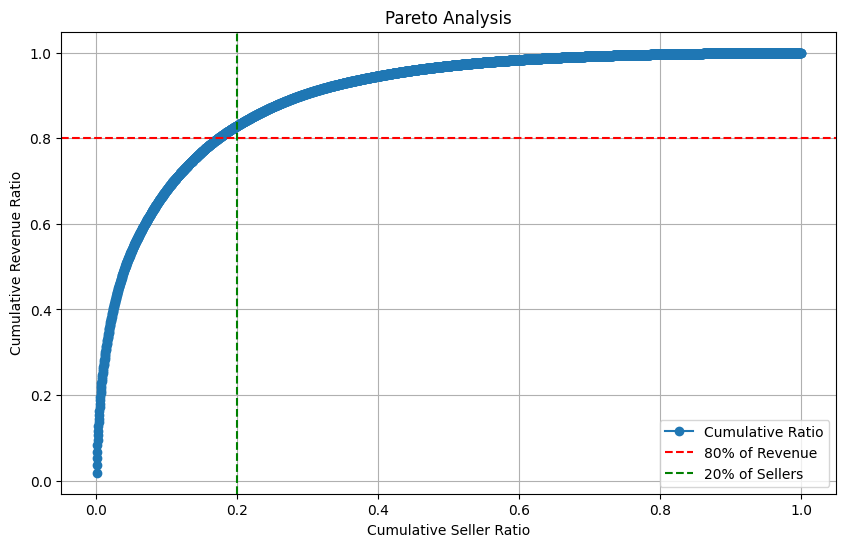

In [ ]:
### 파레토 분석. (다양한 판매자수 확보가 필요할까?)
### why / - 판매자 집중도 확인:  ---- 파레토 분석 결과, 파레토 법칙 yes! 따라서 단순히 판매자수를 늘리는건 큰 효과는 없다.
pareto_df = pd.DataFrame(df.groupby('판매자id')['제품가격_usd'].sum()).reset_index()
pareto_df.columns =['판매자id', '매출']

# 매출에 따라 내림차순 정렬
pareto_df = pareto_df.sort_values(by='매출', ascending=False)
 
# 누적 매출 비율 계산
pareto_df['누적매출비율'] = pareto_df['매출'].cumsum() / pareto_df['매출'].sum()

# 누적 판매자 비율 계산
pareto_df['누적판매자비율'] = np.arange(1, len(pareto_df) + 1) / len(pareto_df)

# 파레토 원칙 확인
pareto_80 = pareto_df[pareto_df['누적매출비율'] <= 0.8]
print(f"상위 {len(pareto_80)}개 판매자가 매출의 80%를 차지합니다. (파레토 법칙 yes)")

# 결과 출력
print(pareto_df)
 
# 시각화 (선택사항)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pareto_df['누적판매자비율'], pareto_df['누적매출비율'], marker='o', label='Cumulative Ratio')
plt.axhline(0.8, color='r', linestyle='--', label='80% of Revenue')
plt.axvline(0.2, color='g', linestyle='--', label='20% of Sellers')
plt.xlabel('Cumulative Seller Ratio')
plt.ylabel('Cumulative Revenue Ratio')
plt.title('Pareto Analysis')
plt.legend()
plt.grid()
plt.show()

In [ ]:
seller_state = df[['판매자id', '판매자 주(state)']].drop_duplicates().reset_index(drop=True)
seller_state['판매자 주(state)'].value_counts()

판매자 주(state)
SP    1783
PR     338
MG     233
SC     185
RJ     167
RS     124
GO      37
DF      30
ES      23
BA      19
CE      12
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PA       1
AM       1
PI       1
MA       1
Name: count, dtype: int64

In [ ]:
customer_state =df[['고객_유니크id', '고객_주(state)']].drop_duplicates().reset_index(drop=True)
customer_state['고객_주(state)'].value_counts()

고객_주(state)
SP    39085
RJ    11928
MG    10909
RS     5125
PR     4729
SC     3422
BA     3177
DF     2016
ES     1912
GO     1876
PE     1564
CE     1273
PA      910
MT      854
MA      703
MS      677
PB      501
PI      469
RN      457
AL      390
SE      332
TO      267
RO      231
AM      140
AC       75
AP       66
RR       41
Name: count, dtype: int64

## 배송 시간 단축하기 !!   문제 해결해보자
- 가장 문제가 되는 변수는 배송소요시간, 전체물류처리시간, 고객_판매자_거리_km입니다. 이 변수들이 매우 유의미하고, 결과에 미치는 영향력이 크며, 개선이 필요해 보입니다. 

—>>> 이 세 변수중에 가장 기본이 되는 , 가장 문제의 원인이 되는 기본 변수가 뭐야?
- 이 세 변수 중에서 가장 기본이 되는, 문제의 원인이 되는 변수는 고객_판매자_거리_km입니다. 이유는 다음과 같습니다:  
    - 전체물류처리시간 중에 배송소요시간이 차지하는게 매우 크므로!!!!


- 지역 물류 허브 확충: 고객과의 거리를 줄여 배송 시간 단축.
    - (#  전체 물류 처리시간: 제품이 고객에게 배송되기까지의 전체적인 물류 과정에서 소요되는 시간)

**** 고객과 판매자 간의 거리를 줄이는 것은 이커머스에서 배송 효율성과 고객 만족도를 높이는 중요한 요소입니다. 고객_판매자_거리_km가 긴 경우 배송 소요시간이 길어지고, 배송비가 증가하는 등 여러 문제가 발생할 수 있습니다. 아래는 고객과 판매자 간의 거리를 줄이는 방법을 제시한 몇 가지 전략입니다:

In [ ]:
''' 지역별 물류센터 추가 설치

현재 상황: 고객-판매자 간 거리가 500km 이상인 지역에서 평균 배송소요시간이 3일 초과.
개선 방안: 해당 지역 근처에 소형 물류센터를 설치하여 배송 시간을 2일로 단축.

'''

In [24]:
c_all = pd.DataFrame(df[[  '고객_주(state)', '판매자 주(state)', '배송소요시간',    '전체물류처리시간',  '고객_판매자_거리_km']].value_counts()).reset_index()
 
## 고객과 판매자 주가 같은 경우 
print(c_all[c_all['고객_주(state)']!= c_all['판매자 주(state)']]['고객_판매자_거리_km'].mean())
print(c_all[c_all['고객_주(state)']== c_all['판매자 주(state)']]['고객_판매자_거리_km'].mean())

853.8055971139789
154.031249020056


In [47]:
## 고객_판매자 거리 km == 154 기점으로 거리부터 배송 소요시간, 전체 물류 처리시간 등이 극단적으로 차이난다!! 

In [45]:
c_all[c_all['고객_판매자_거리_km']<=154][['고객_판매자_거리_km','배송소요시간'	,'전체물류처리시간']].describe()[1:2]

,고객_판매자_거리_km,배송소요시간,전체물류처리시간
mean,57.254103,3.251492,5.926935


In [97]:
### 파레토 분석. (다양한 판매자수 확보가 필요할까?)
### why / - 판매자 집중도 확인:  ---- 파레토 분석 결과, 파레토 법칙 yes! 따라서 단순히 판매자수를 늘리는건 큰 효과는 없다.
pareto_df = pd.DataFrame(df.groupby('판매자id')['제품가격_usd'].sum()).reset_index()
pareto_df.columns =['판매자id', '매출']

# 매출에 따라 내림차순 정렬
pareto_df = pareto_df.sort_values(by='매출', ascending=False)
 
# 누적 매출 비율 계산
pareto_df['누적매출비율'] = pareto_df['매출'].cumsum() / pareto_df['매출'].sum()

# 누적 판매자 비율 계산
pareto_df['누적판매자비율'] = np.arange(1, len(pareto_df) + 1) / len(pareto_df)

# 파레토 원칙 확인
pareto_80 = pareto_df[pareto_df['누적매출비율'] <= 0.8]
print(f"상위 {len(pareto_80)}개 판매자가 매출의 80%를 차지합니다. (파레토 법칙 yes)")

# 결과 출력
pareto_80

'''
매출의 파레토 법칙 적용:

상위 516개 판매자가 매출의 80%를 차지합니다. 이는 상위 판매자를 중심으로 물류 센터의 위치를 최적화하는 것이 효과적일 가능성을 시사합니다.
'''
pareto_80

상위 516개 판매자가 매출의 80%를 차지합니다. (파레토 법칙 yes)


,판매자id,매출,누적매출비율,누적판매자비율
829,4869f7a5dfa277a7dca6462dcf3b52b2,64599.268089,0.018297,0.000335
978,53243585a1d6dc2643021fd1853d8905,63221.928175,0.036205,0.000669
2920,fa1c13f2614d7b5c4749cbc52fecda94,56450.236338,0.052194,0.001004
1506,7e93a43ef30c4f03f38b393420bc753a,53975.228892,0.067482,0.001339
853,4a3ca9315b744ce9f8e9374361493884,53469.621892,0.082627,0.001673
...,...,...,...,...
1559,835f0f7810c76831d6c7d24c7a646d4d,1467.571606,0.797995,0.171352
929,503c1de08ae81a2d86f17951b204db55,1467.365783,0.798411,0.171687
2394,cc3d14116804f7209f3884f6367f1152,1458.709237,0.798824,0.172021
672,3ade81dab5a172b88e1871c28ae05260,1456.427019,0.799236,0.172356


In [ ]:
'''
1. 파레토 법칙과 가중치 점수 계산 혼합 --- 혼합 방식을 활용한 점수 계산 공식
- (1) 파레토 법칙 적용
    - 상위 20%의 주(state)에서 전체 판매자 수의 80%를 차지하는 주요 주를 선별합니다.
    - 이 주들을 우선적으로 분석하고 점수 계산에 더 큰 가중치를 부여합니다.
- (2) 가중치 점수 계산
    - 점수 계산 시, 파레토 상위 주에 더 높은 α,β,γ 가중치를 적용합니다.
    - 하위 주에는 상대적으로 낮은 가중치를 적용하여 최적의 물류 센터를 설계합니다.


2. 혼합 방식을 활용한 점수 계산 공식
각 주의 점수를 계산할 때 파레토 법칙 기반 가중치를 추가합니다: 

점수= α* 고객 수 + β *판매자수 * 파레토 가중치−γ⋅(평균 거리)

파레토 가중치:
- 상위 20% 주(state): 가중치 1.5 적용.
- 나머지 주(state): 가중치 1.0 적용.
'''


In [254]:

seller_gps = df[['판매자id', '판매자 주(state)']].drop_duplicates()
pareto = pd.merge(pareto_80, seller_gps, how='inner', left_on='판매자id', right_on='판매자id')
 
pareto['파레토법칙결과'] ='상'

adddd = pd.DataFrame(df['판매자id'].value_counts()).reset_index()
adddd.columns = ['판매자id','고객수']
 
adddd = pd.merge(adddd, df[['판매자id','판매자 주(state)']].drop_duplicates(), left_on='판매자id', right_on='판매자id')
p111= pd.DataFrame(df.groupby(['판매자id'])[ '고객_판매자_거리_km'].mean()).reset_index()
adddd = pd.merge(adddd, p111, left_on='판매자id', right_on='판매자id')
adddd.columns = ['판매자id',	'고객수',	'판매자 주(state)',	'고객_판매자_거리_km(평균)']

pareto.drop(['판매자 주(state)'],axis=1, inplace=True)
pareto = pd.merge(pareto ,adddd,  how='outer', left_on='판매자id', right_on='판매자id')
#pareto['판매자 주(state)'].value_counts()
pareto['파레토법칙결과']= pareto['파레토법칙결과'].fillna('하')
pareto = pd.merge(pareto ,df[['판매자id','판매자 도시']].drop_duplicates(),  how='inner', left_on='판매자id', right_on='판매자id')
pareto 

,판매자id,매출,누적매출비율,누적판매자비율,파레토법칙결과,고객수,판매자 주(state),고객_판매자_거리_km(평균)
0,4869f7a5dfa277a7dca6462dcf3b52b2,64599.268089,0.018297,0.000335,상,1118,SP,610.656142
1,53243585a1d6dc2643021fd1853d8905,63221.928175,0.036205,0.000669,상,356,BA,1137.568648
2,fa1c13f2614d7b5c4749cbc52fecda94,56450.236338,0.052194,0.001004,상,577,SP,690.021980
3,7e93a43ef30c4f03f38b393420bc753a,53975.228892,0.067482,0.001339,상,334,SP,661.311718
4,4a3ca9315b744ce9f8e9374361493884,53469.621892,0.082627,0.001673,상,1766,SP,554.759608
...,...,...,...,...,...,...,...,...
2983,26e2e5033827d2ba53929f43e03d8ffe,NaN,NaN,NaN,하,1,SP,118.966577
2984,d263fa444c1504a75cbca5cc465f592a,NaN,NaN,NaN,하,1,SP,2313.446408
2985,2c9005d8043aff18b8557ffb7b13cda4,NaN,NaN,NaN,하,1,ES,618.281072
2986,08d1c9478fb0d7d7fcac9c0da4e82fc7,NaN,NaN,NaN,하,1,MG,599.582393


In [ ]:
점수= α* 고객 수 + β *판매자수 * 파레토 가중치−γ⋅(평균 거리)

파레토 가중치:
- 상위 20% 주(state): 가중치 1.5 적용.
- 나머지 주(state): 가중치 1.0 적용.

# 가중치 설정
alpha = 0.6  # 고객 수의 중요도
beta = 0.1   # 판매자 수의 중요도
gamma = 0.3  # 평균 거리의 중요도

In [222]:
pd.DataFrame(pareto[pareto['파레토법칙결과']=='상']['판매자 주(state)'].value_counts()).reset_index().head(6) 
## 이 주들만 파레토 가중치 

,판매자 주(state),count
0,SP,307
1,PR,61
2,MG,51
3,RJ,27
4,SC,27
5,RS,17


In [227]:
## 주(state)별 데이터로 만들기 
pareto_state= df.groupby('판매자 주(state)').agg(
    고객_평균거리=('고객_판매자_거리_km', 'mean'),
    고객_수=('고객_유니크id', 'count'),
    판매자_수=('판매자id', 'nunique')).reset_index()

pareto_state['pareto_weight']= 1
pareto_state['pareto_weight'][(pareto_state['판매자 주(state)'] =='SP')| (pareto_state['판매자 주(state)'] =='PR')|(pareto_state['판매자 주(state)'] =='MG')| (pareto_state['판매자 주(state)'] =='RJ')| (pareto_state['판매자 주(state)'] =='SC')|(pareto_state['판매자 주(state)'] =='RS')] =1.5


/var/folders/32/kf__h26s36l08d_ty7fh2xjr0000gn/T/ipykernel_42668/2981240116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pareto_state['pareto_weight'][(pareto_state['판매자 주(state)'] =='SP')| (pareto_state['판매자 주(state)'] =='PR')|(pareto_state['판매자 주(state)'] =='MG')| (pareto_state['판매자 주(state)'] =='RJ')| (pareto_state['판매자 주(state)'] =='SC')|(pareto_state['판매자 주(state)'] =='RS')] =1.5


In [229]:
pareto_state

,판매자 주(state),고객_평균거리,고객_수,판매자_수,pareto_weight
0,AM,2327.352004,3,1,1.0
1,BA,1120.804431,563,19,1.0
2,CE,1638.109401,89,12,1.0
3,DF,852.505113,805,30,1.0
4,ES,810.717147,303,23,1.0
5,GO,850.265202,447,37,1.0
6,MA,1944.432167,387,1,1.0
7,MG,600.793143,7609,233,1.5
8,MS,1020.636980,42,5,1.0
9,MT,1379.320945,134,4,1.0


In [238]:
import pandas as pd

# 주별 고객 수, 판매자 수, 평균 거리 데이터
 
# 가중치 설정
alpha = 0.7  # 고객 수의 중요도
beta = 0.3   # 판매자 수의 중요도
gamma = 0.1  # 평균 거리의 중요도

# 점수 계산
pareto_state['score'] = (
    (alpha * pareto_state['고객_수']) + 
    (beta * pareto_state['판매자_수'] * pareto_state['pareto_weight']) - 
    (gamma * pareto_state['고객_평균거리'])
)

# 점수 순위 정렬
pareto_state_sorted = pareto_state.sort_values(by='score', ascending=False)

# 결과 출력
pareto_state_sorted['지역구분_자연'] = ''

amazon = ['AM','AC','RO','MT','PA','AP','RR']
#pantanal = []
pampa=['RS']
atlantic_forest=['PR','SC','SP','RJ','ES','DF']
cerrado = ['MS','GO','MG','TO','MA']
caatinga=['PI','CE','BA','PE','RN','PB','SE']

for s in pareto_state_sorted['판매자 주(state)'].unique():
    if s in amazon :
        pareto_state_sorted['지역구분_자연'][pareto_state_sorted['판매자 주(state)'] ==s] = 'amazon'
    elif s in pampa:
        pareto_state_sorted['지역구분_자연'][pareto_state_sorted['판매자 주(state)'] ==s] = 'pampa'
    elif s in atlantic_forest:
        pareto_state_sorted['지역구분_자연'][pareto_state_sorted['판매자 주(state)'] ==s] = 'atlantic_forest'
    elif s in cerrado :
        pareto_state_sorted['지역구분_자연'][pareto_state_sorted['판매자 주(state)'] ==s] = 'cerrado'
    elif s in caatinga:
        pareto_state_sorted['지역구분_자연'][pareto_state_sorted['판매자 주(state)'] ==s] = 'caatinga'


/var/folders/32/kf__h26s36l08d_ty7fh2xjr0000gn/T/ipykernel_42668/2028314847.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pareto_state_sorted['지역구분_자연'][pareto_state_sorted['판매자 주(state)'] ==s] = 'atlantic_forest'
/var/folders/32/kf__h26s36l08d_ty7fh2xjr0000gn/T/ipykernel_42668/2028314847.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pareto_state_sorted['지역구분_자연'][pareto_state_sorted['판매자 주(state)'] ==s] = 'cerrado'
/var/folders/32/kf__h26s36l08d_ty7fh2xjr0000gn/T/ipykernel_42668/2028314847.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [241]:

##확실히 덜 발달된 지역(아마존 등)에는 사람(판매자, 고객)도 적게 살겠고, 물류 센터를 설치 안하는게 좋다.
## 브라질 자체가 지리적으로 모든 지역이 살기 좋진 않구나. (우리나라와 다름)
# 브라질은 주로 열대와 아열대 기후에 속합니다. 
# 브라질의 주요 대도시인 상파울루 (SP), 리오데자네이로 (RJ), 브라질리아 (DF), 포르투알레그레 (RS) 등은 잘 발달된 인프라와 생활 편의 시설을 제공합니다. 이들 도시에서는 고급 주택, 쇼핑몰, 문화적 활동, 교통 등이 잘 갖춰져 있어 거주하기 편리합니다
# 아마존은  생활 여건이 열악하고, 치안과 의료 환경이 취약
'''
1. Atlantic Forest (아틀란틱 숲)
주(state): ['PR','SC','SP','RJ','ES','DF']
 # 브라질의 주요 대도시인 상파울루 (SP), 리오데자네이로 (RJ), 브라질리아 (DF), 포르투알레그레 (RS) 등은 잘 발달된 인프라와 생활 편의 시설을 제공합니다. 이들 도시에서는 고급 주택, 쇼핑몰, 문화적 활동, 교통 등이 잘 갖춰져 있어 거주하기 편리합니다
#  주로 PR, SC, SP, RJ, ES 지역에 해당합니다. 이 지역은 사계절이 뚜렷하고, 여름에는 더운 날씨와 함께 비가 많이 오는 특징이 있습니
특징: 브라질의 동쪽 해안선을 따라 펼쳐진 열대 및 아열대 우림 지역입니다. 매우 다양한 생물종이 서식하는 지역으로 알려져 있습니다.

2. Cerrado (세라도)
주(state):  ['MS','GO','MG','TO','MA']

특징: 온화한 기후와 상대적으로 편리한 생활 환경


3. Pampa (팜파)
주(state): ['RS']
특징:  , 주로 농업과 목축업이 중심인 지역.상대적으로 편리한 생활 환경



4. Caatinga (카팅가)
주(state): ['PI','CE','BA','PE','RN','PB','SE']
 
 

5. Amazon (아마존)
주(state): ['AM','AC','RO','MT','PA','AP','RR']
 
'''

## 우선 선택과 집중을. 버릴 지역은 버려야 한다. 모든 지역을 첨부터 커버 xx 아마존, 카팅가는 확실히 버린다.

pareto_state_sorted.reset_index(drop=True, inplace=True)
pareto_state_sorted

,판매자 주(state),고객_평균거리,고객_수,판매자_수,pareto_weight,score,지역구분_자연
0,SP,543.003331,68234,1783,1.5,48511.849667,atlantic_forest
1,MG,600.793143,7609,233,1.5,5371.070686,cerrado
2,PR,723.188205,7431,338,1.5,5281.481180,atlantic_forest
3,RJ,585.989289,4156,167,1.5,2925.751071,atlantic_forest
4,SC,756.601308,3568,185,1.5,2505.189869,atlantic_forest
5,RS,989.327922,1906,124,1.5,1291.067208,pampa
6,DF,852.505113,805,30,1.0,487.249489,atlantic_forest
7,BA,1120.804431,563,19,1.0,287.719557,caatinga
8,GO,850.265202,447,37,1.0,238.973480,cerrado
9,ES,810.717147,303,23,1.0,137.928285,atlantic_forest


In [246]:
pareto_state_sorted.head()

'''
2. 판매자 밀집도
주요 판매자 위치: 판매자가 밀집한 지역에 물류 센터를 설치하면, 재고 관리 및 물류 비용을 절감할 수 있습니다. 
파레토 법칙(상위 20% 판매자가 대부분의 매출을 차지하는 원칙)에 따라 주요 판매자가 집중된 지역에 우선적으로 물류 센터를 설치하는 전략이 유효할 수 있습니다.
'''

,판매자 주(state),고객_평균거리,고객_수,판매자_수,pareto_weight,score,지역구분_자연
0,SP,543.003331,68234,1783,1.5,48511.849667,atlantic_forest
1,MG,600.793143,7609,233,1.5,5371.070686,cerrado
2,PR,723.188205,7431,338,1.5,5281.481180,atlantic_forest
3,RJ,585.989289,4156,167,1.5,2925.751071,atlantic_forest
4,SC,756.601308,3568,185,1.5,2505.189869,atlantic_forest


In [275]:
# 주 안에서 어떤 도시?
## SP
print('state : SP')
print()
print(pareto[pareto['판매자 주(state)'] =='SP']['판매자 도시'].value_counts().head(3))
print('---------------------------------')
print('파레토법칙결과 : 상')
pareto[(pareto['판매자 주(state)'] =='SP') & (pareto['파레토법칙결과'] =='상')]['판매자 도시'].value_counts().head(3)

state : SP

판매자 도시
sao paulo         670
ribeirao preto     51
guarulhos          48
Name: count, dtype: int64
---------------------------------
파레토법칙결과 : 상


판매자 도시
sao paulo    107
ibitinga      15
guarulhos     11
Name: count, dtype: int64

In [287]:
# 주 안에서 어떤 도시?
## MG
print('=================================')
print('state : MG')
print()
print(pareto[pareto['판매자 주(state)'] =='MG']['판매자 도시'].value_counts().head(3))
print('---------------------------------')
print('파레토법칙결과 : 상')
pareto[(pareto['판매자 주(state)'] =='MG') & (pareto['파레토법칙결과'] =='상')]['판매자 도시'].value_counts().head(3)


state : MG

판매자 도시
belo horizonte    63
contagem          12
uberlandia        12
Name: count, dtype: int64
---------------------------------
파레토법칙결과 : 상


판매자 도시
belo horizonte    12
uba                4
betim              3
Name: count, dtype: int64

In [286]:
## PR
print('=================================')
print('state : PR')
print()
print(pareto[pareto['판매자 주(state)'] =='PR']['판매자 도시'].value_counts().head(3))
print('---------------------------------')
print('파레토법칙결과 : 상')
pareto[(pareto['판매자 주(state)'] =='PR') & (pareto['파레토법칙결과'] =='상')]['판매자 도시'].value_counts().head(3)
 

state : PR

판매자 도시
curitiba    118
maringa      40
londrina     22
Name: count, dtype: int64
---------------------------------
파레토법칙결과 : 상


판매자 도시
curitiba    20
maringa     11
londrina     4
Name: count, dtype: int64

In [283]:

## RJ
print('=================================')
print('state : RJ')
print()
print(pareto[pareto['판매자 주(state)'] =='RJ']['판매자 도시'].value_counts().head(3))
print('---------------------------------')
print('파레토법칙결과 : 상')
pareto[(pareto['판매자 주(state)'] =='RJ') & (pareto['파레토법칙결과'] =='상')]['판매자 도시'].value_counts().head(3)
 

state : RJ

판매자 도시
rio de janeiro    90
sao goncalo        7
niteroi            7
Name: count, dtype: int64
---------------------------------
파레토법칙결과 : 상


판매자 도시
rio de janeiro    12
sao goncalo        3
teresopolis        2
Name: count, dtype: int64

In [284]:

## PR
print('=================================')
print('state : PR')
print()
print(pareto[pareto['판매자 주(state)'] =='PR']['판매자 도시'].value_counts().head(3))
print('---------------------------------')
print('파레토법칙결과 : 상')
pareto[(pareto['판매자 주(state)'] =='PR') & (pareto['파레토법칙결과'] =='상')]['판매자 도시'].value_counts().head(3)

state : PR

판매자 도시
curitiba    118
maringa      40
londrina     22
Name: count, dtype: int64
---------------------------------
파레토법칙결과 : 상


판매자 도시
curitiba    20
maringa     11
londrina     4
Name: count, dtype: int64

- 따라서 각 도시의 특징을 고려하여 물류 센터 설치 위치를 결정하는 것이 중요합니다.

In [ ]:
'''


상파울루 (SP): 경제 중심지로 물류 센터 설치 시 효율적인 물류 운송과 높은 고객 수를 대상으로 한 서비스를 제공할 수 있습니다.
벨루오리존치 (MG): 산업 중심지로 내륙 지역에 대한 물류 서비스 강화가 가능하고, 교통망이 잘 연결되어 있습니다.
리오데자네이로 (RJ): 항만과 공항 인프라가 발달하여 국제 물류와 해상 물류를 처리하기에 적합합니다.

'''

In [ ]:
# https://www.scielo.br/j/pab/a/D9zNwnnWLFXbNWLDYQ9v9Pd/